# OMXS30 Exploration

## Download the data of the last 5 years and plot the relative gain
The data is downloaded using yahoo finance, I ensured that the prices match the one on Avanza (the close price).

In [1]:
tickers_OMX = [
    'SCA-B.ST',
    'HM-B.ST',
    'VOLV-B.ST',
    'SINCH.ST',
    'SBB-B.ST',
    'GETI-B.ST',
    'EVO.ST',
    'ATCO-A.ST',
    'ATCO-B.ST',
    'KINV-B.ST',
    'ELUX-B.ST',
    'ERIC-B.ST',
    'TELIA.ST',
    'SWED-A.ST',
    'ALFA.ST',
    'SEB-A.ST',
    'ABB.ST',
    'INVE-B.ST',
    'NIBE-B.ST',
    'ESSITY-B.ST',
    'ASSA-B.ST',
    'HEXA-B.ST',
    'SKF-B.ST',
    'SHB-A.ST',
    'AZN.ST',
    'NDA-SE.ST',
    'TEL2-B.ST',
    'SAND.ST',
    'BOL.ST',
    'ALIV-SDB.ST',
    '^OMX',
]
len(tickers_OMX)== 30 + 1

True

In [2]:
from data.loader import DataLoader, DataLoaderConfig

loader = DataLoader(DataLoaderConfig(tickers=tickers_OMX))

get_data = lambda : loader.get_dataframe(tickers_OMX, columns='Close', start='2018-09-01', end='2023-09-01')

get_data().head()

,SCA-B.ST,HM-B.ST,VOLV-B.ST,SINCH.ST,SBB-B.ST,GETI-B.ST,EVO.ST,ATCO-A.ST,ATCO-B.ST,KINV-B.ST,...,HEXA-B.ST,SKF-B.ST,SHB-A.ST,AZN.ST,NDA-SE.ST,TEL2-B.ST,SAND.ST,BOL.ST,ALIV-SDB.ST,^OMX
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-03 00:00:00+02:00,102.081818,101.200150,123.980110,10.76,8.013780,101.548660,138.134079,53.250935,50.305756,274.656677,...,77.301773,147.724426,87.014969,690.727356,94.216003,77.946129,145.568451,184.644455,797.795166,1660.140015
2018-09-04 00:00:00+02:00,99.930206,99.649010,122.480179,10.92,7.931077,100.191559,134.556519,53.088306,50.119434,270.848328,...,75.723618,146.581894,86.583031,681.328918,93.541374,77.774590,143.293243,180.289993,797.006042,1645.949951
2018-09-05 00:00:00+02:00,99.308632,99.861275,122.085472,10.68,7.931077,100.051163,130.382675,52.722385,49.601894,261.146027,...,73.750916,144.846939,85.954765,670.644470,93.560661,77.774590,140.426483,179.526062,771.951599,1631.739990
2018-09-06 00:00:00+02:00,98.495804,100.514389,122.085472,10.50,8.096480,100.191559,129.885788,51.634808,48.753109,261.055328,...,74.201813,142.731171,86.308167,666.588440,94.158180,78.460747,138.651810,177.463425,769.387085,1632.420044
2018-09-07 00:00:00+02:00,98.687050,99.012215,120.388199,10.30,8.096480,99.396011,130.482040,50.181313,47.086601,259.423187,...,74.258171,142.054123,85.169434,666.291565,93.271523,79.284119,137.696213,172.879776,767.414307,1618.199951


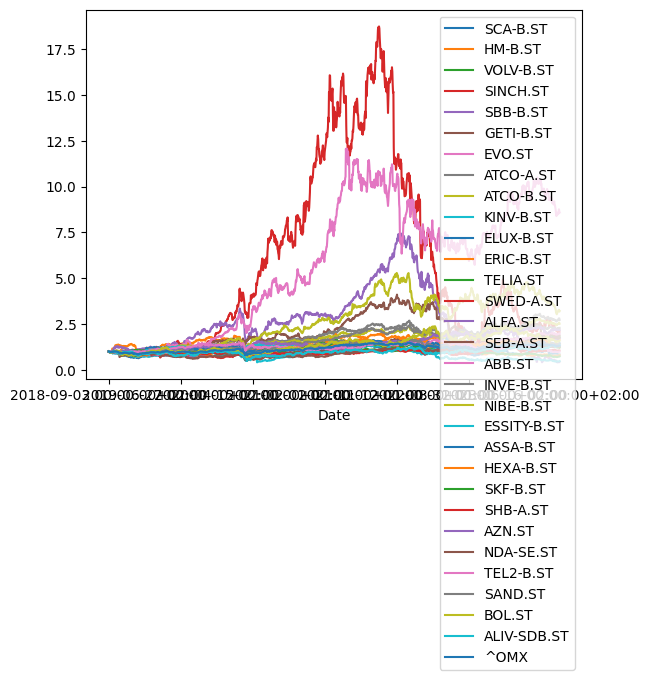

In [3]:
import matplotlib.pyplot as plt

data = get_data()

# Divide each column by the price at start date
data = data/data.iloc[0]

# Plot the prices and show a red bar in red when it is NaN
data.plot()
plt.show()

## Plot the correlation between the index and the stocks from the index

Look at the strongest and lowest correlation and plots the graphs side by side

/opt/conda/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


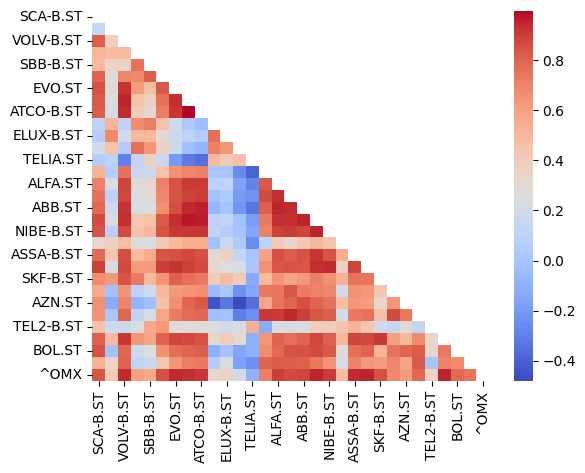

In [5]:
import seaborn as sns
import numpy as np
corr = data.corr()
# Only keep the upper right triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Check the stocks the most correlated with the index over the last 5 years

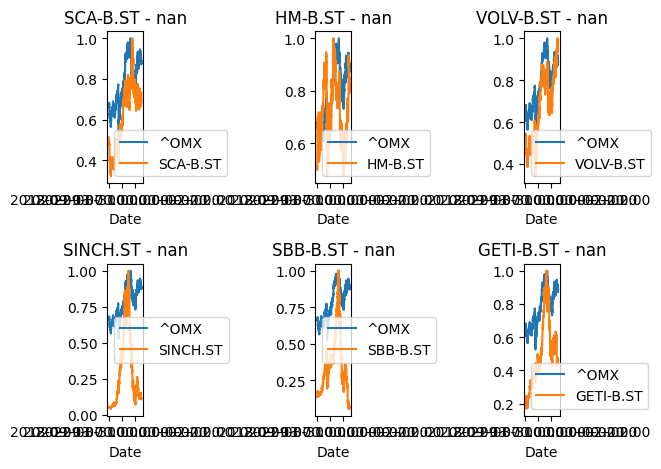

In [9]:
corr_omx = corr['^OMX'].sort_values(ascending=False)

for k, (index, value) in enumerate(corr_omx.items()):
    plt.subplot(2,3,k+1)
    (data['^OMX']/(data['^OMX'].max())).plot()
    (data[index]/(data[index].max())).plot()
    plt.legend()
    plt.title(f'{index} - {value:.2f}')
    if k == 5:
        break
plt.tight_layout()
plt.show()

Check the stocks that are the less correlated

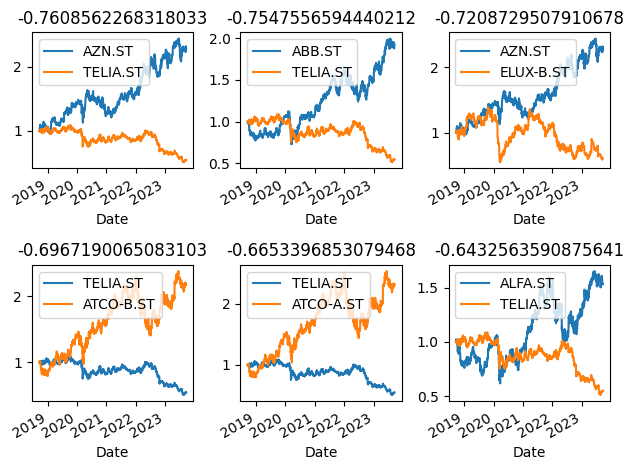

In [5]:
import numpy as np
indices = np.argsort(corr, axis=None)
indices = np.unravel_index(indices, corr.shape)
indices = list(zip(*indices))

values = corr.values
for k, index in enumerate(indices[:6]):
    plt.subplot(2,3, k+1)
    x, y = corr.index[index[0]], corr.columns[index[1]]
    data[x].plot()
    data[y].plot()
    plt.legend()
    plt.title(values[index])
plt.tight_layout()
plt.show()


## Compute the beta of the different stocks

In [10]:
# Importing libraries and packages
import statsmodels.api as sm
from statsmodels import regression
import pandas as pd

# Resample the data to monthly frequency
data_monthly = data.resample('m').last()

# Convert to percentage returns
data_monthly = data_monthly.pct_change()

# Remove the first row which is NaN
data_monthly.dropna(inplace=True)

# Get the column OMX_30 and remove it from the dataframe
omx = data_monthly['OMX_30']
data_monthly.drop(columns=['OMX_30'], inplace=True)

def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()

    # We are removing the constant
    x = x[:, 1]
    return model.params[0], model.params[1]

betas = []
for ticker in data_monthly.columns:
    # Get the column for the ticker
    col = data_monthly[ticker]
    alpha, beta = linreg(omx.values, col.values)
    betas.append(beta)

# Create a dataframe with the tickers and betas
df_betas = pd.DataFrame()
df_betas['Ticker'] = data_monthly.columns
df_betas['Beta'] = betas

# Set the index to be the tickers
df_betas.set_index('Ticker', inplace=True)

df_betas.head()  


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

/tmp/ipykernel_5089/3694456201.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


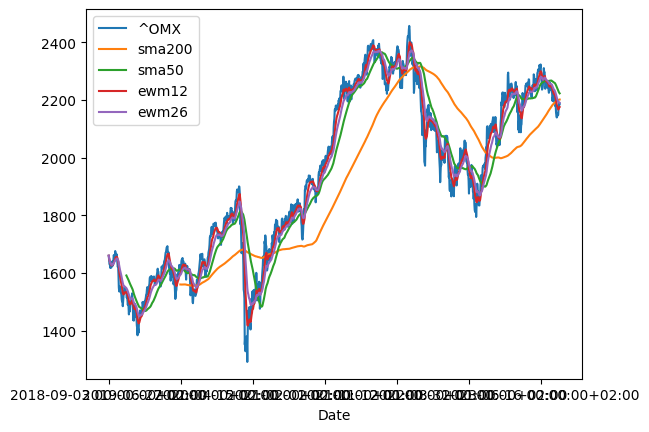

In [26]:
data = get_data()
data.fillna(method='ffill', inplace=True)

data['^OMX'].plot()
# Compute the simple moving average
sma = data.rolling(200).mean()
sma['^OMX'].plot(label='sma200')
sma = data.rolling(50).mean()
sma['^OMX'].plot(label='sma50')

# Compute the exponential moving average
ema = data.ewm(span=12).mean()
ema['^OMX'].plot(label='ewm12')
ema = data.ewm(span=26).mean()
ema['^OMX'].plot(label='ewm26')

plt.legend()
plt.show()

/tmp/ipykernel_5089/1983619082.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_5089/1983619082.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{ticker}_TP'] = (
/tmp/ipykernel_5089/1983619082.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{ticker}_TP'] = (
/tmp/ipykernel_5089/1983619082.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is 

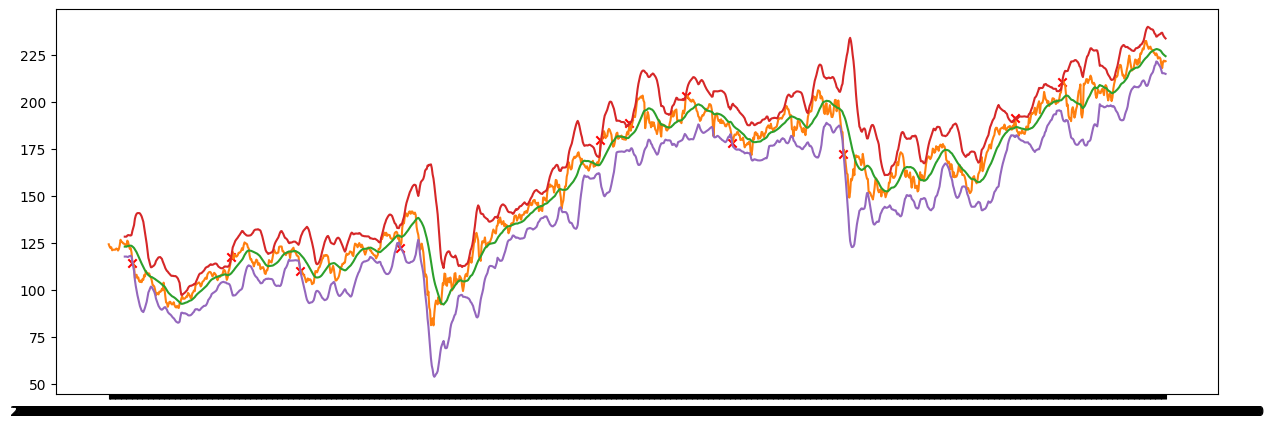

In [62]:
data = loader.get_dataframe(
    tickers_OMX,
    columns=['High', 'Low', 'Close'],
    start='2018-09-01',
    end='2023-09-01'
)

data.fillna(method='ffill', inplace=True)
for ticker in tickers_OMX:
    data[f'{ticker}_TP'] = (
        data[f'{ticker}_High'] + data[f'{ticker}_Low'] + data[f'{ticker}_Close']
    )/3


ticker = 'VOLV-B.ST'
close = f'{ticker}_Close'
tp = f'{ticker}_TP'
# Compute the simple moving average
sma = data.rolling(20).mean()
std = data.rolling(20).std()
bolu = sma + 3*std
bold = sma - 3*std

crossings = (data[close] > bolu[tp]) | (data[close] < bold[tp])
# Plot where the data points are out of the bollinger bands
data[close] = data[close][crossings]

plt.figure(figsize=(15,5))
plt.plot(data.index, data[close], label=close)
plt.plot(data.index, data[tp], label=tp)
plt.plot(data.index, sma[tp], label='sma20')
plt.plot(data.index, bolu[tp], label='bolu')
plt.plot(data.index, bold[tp], label='bold')
plt.scatter(data.index, data[close], marker='x', color='red', label='out of bands')
plt.show()